In [1]:
import pyspark
from pyspark.sql import SparkSession

### Inisialisasi Spark

In [2]:
spark = SparkSession.builder.appName("Pyspark Exercise").config("spark.memory.offHeap.enabled","true").config("spark.memory.offHeap.size","10g").getOrCreate()

In [3]:
df = spark.read.csv('D:\KULIAH\sales_data.csv', header =True)

In [4]:
df.show(5)

+----------+---+--------+----+------------+--------------+---------------+---------+----------------+----------------+------------+-------------------+--------------+---------+----------+------+----+-------+
|      Date|Day|   Month|Year|Customer_Age|     Age_Group|Customer_Gender|  Country|           State|Product_Category|Sub_Category|            Product|Order_Quantity|Unit_Cost|Unit_Price|Profit|Cost|Revenue|
+----------+---+--------+----+------------+--------------+---------------+---------+----------------+----------------+------------+-------------------+--------------+---------+----------+------+----+-------+
|2013-11-26| 26|November|2013|          19|   Youth (<25)|              M|   Canada|British Columbia|     Accessories|  Bike Racks|Hitch Rack - 4-Bike|             8|       45|       120|   590| 360|    950|
|2015-11-26| 26|November|2015|          19|   Youth (<25)|              M|   Canada|British Columbia|     Accessories|  Bike Racks|Hitch Rack - 4-Bike|             8|  

### Select in Spark

In [5]:
df.select('Date', 'Product', 'Revenue').show()

+----------+-------------------+-------+
|      Date|            Product|Revenue|
+----------+-------------------+-------+
|2013-11-26|Hitch Rack - 4-Bike|    950|
|2015-11-26|Hitch Rack - 4-Bike|    950|
|2014-03-23|Hitch Rack - 4-Bike|   2401|
|2016-03-23|Hitch Rack - 4-Bike|   2088|
|2014-05-15|Hitch Rack - 4-Bike|    418|
|2016-05-15|Hitch Rack - 4-Bike|    522|
|2014-05-22|Hitch Rack - 4-Bike|    379|
|2016-05-22|Hitch Rack - 4-Bike|    190|
|2014-02-22|Hitch Rack - 4-Bike|   2086|
|2016-02-22|Hitch Rack - 4-Bike|   1991|
|2013-07-30|Hitch Rack - 4-Bike|    758|
|2015-07-30|Hitch Rack - 4-Bike|    758|
|2013-07-15|Hitch Rack - 4-Bike|    664|
|2015-07-15|Hitch Rack - 4-Bike|    664|
|2013-08-02|Hitch Rack - 4-Bike|    594|
|2015-08-02|Hitch Rack - 4-Bike|    832|
|2013-09-02|Hitch Rack - 4-Bike|    238|
|2015-09-02|Hitch Rack - 4-Bike|    119|
|2014-01-22|Hitch Rack - 4-Bike|    119|
|2016-01-22|Hitch Rack - 4-Bike|    119|
+----------+-------------------+-------+
only showing top

In [11]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

df.select('Month', 'Sub_Category', 'Cost') \
    .filter((col('Cost')<100) & (col('Month')=='May')) \
        .orderBy(desc('Sub_Category')).show()

+-----+------------+----+
|Month|Sub_Category|Cost|
+-----+------------+----+
|  May|       Vests|  72|
|  May|       Vests|  48|
|  May|       Vests|  48|
|  May|       Vests|  72|
|  May|       Vests|  24|
|  May|       Vests|  24|
|  May|       Vests|  24|
|  May|       Vests|  72|
|  May|       Vests|  48|
|  May|       Vests|  24|
|  May|       Vests|  72|
|  May|       Vests|  96|
|  May|       Vests|  48|
|  May|       Vests|  24|
|  May|       Vests|  96|
|  May|       Vests|  72|
|  May|       Vests|  72|
|  May|       Vests|  72|
|  May|       Vests|  72|
|  May|       Vests|  48|
+-----+------------+----+
only showing top 20 rows



In [ ]:
df.count() 

113036

In [ ]:
df.select('Date').distinct().count()

1884

In [9]:
df.groupBy('Product_Category').agg(sum('Order_Quantity').alias('Total Order')).show()

+----------------+-----------+
|Product_Category|Total Order|
+----------------+-----------+
|        Clothing|   254743.0|
|     Accessories|  1054162.0|
|           Bikes|    36411.0|
+----------------+-----------+



In [12]:
df.groupBy('Sub_Category').agg(countDistinct('Order_Quantity').alias('Total Order')).orderBy(desc('Total Order')).show()

+-----------------+-----------+
|     Sub_Category|Total Order|
+-----------------+-----------+
|          Jerseys|         32|
|            Vests|         32|
|Bottles and Cages|         32|
|           Shorts|         32|
|  Tires and Tubes|         32|
|         Cleaners|         32|
|            Socks|         32|
|           Gloves|         32|
|          Fenders|         32|
|  Hydration Packs|         32|
|             Caps|         32|
|          Helmets|         32|
|       Bike Racks|         30|
|      Bike Stands|         12|
|   Mountain Bikes|          4|
|       Road Bikes|          4|
|    Touring Bikes|          3|
+-----------------+-----------+



In [ ]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df = df.withColumn('date',to_timestamp("Date", 'yy-MM-dd'))
df.select(max("date")).show()

+-------------------+
|          max(date)|
+-------------------+
|2016-07-31 00:00:00|
+-------------------+



In [ ]:
df.select(min("date")).show()

+-------------------+
|          min(date)|
+-------------------+
|2011-01-01 00:00:00|
+-------------------+



### Cetak schema

In [ ]:
df.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- Day: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Customer_Age: string (nullable = true)
 |-- Age_Group: string (nullable = true)
 |-- Customer_Gender: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Product_Category: string (nullable = true)
 |-- Sub_Category: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Order_Quantity: string (nullable = true)
 |-- Unit_Cost: string (nullable = true)
 |-- Unit_Price: string (nullable = true)
 |-- Profit: string (nullable = true)
 |-- Cost: string (nullable = true)
 |-- Revenue: string (nullable = true)



In [ ]:
df.groupBy('Product').agg(count('Unit_Cost').alias('Total Cost')).orderBy(desc('Total Cost')).show()

+--------------------+----------+
|             Product|Total Cost|
+--------------------+----------+
|Water Bottle - 30...|     10794|
| Patch Kit/8 Patches|     10416|
|  Mountain Tire Tube|      6816|
|        AWC Logo Cap|      4358|
|Sport-100 Helmet,...|      4220|
|      Road Tire Tube|      4176|
|Sport-100 Helmet,...|      4152|
|Fender Set - Moun...|      4032|
|Sport-100 Helmet,...|      3788|
|   Touring Tire Tube|      3702|
|    Road Bottle Cage|      2640|
|Mountain Bottle Cage|      2444|
|Bike Wash - Disso...|      1804|
|    HL Mountain Tire|      1800|
|        LL Road Tire|      1686|
|        ML Road Tire|      1396|
|    ML Mountain Tire|      1376|
|Hydration Pack - ...|      1332|
|Mountain-200 Blac...|      1208|
|Mountain-200 Silv...|      1106|
+--------------------+----------+
only showing top 20 rows



### Visualisasi Data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_avg_profit = df.groupBy('Country').agg(avg('Profit').alias('Average_Profit')).orderBy(desc('Average_Profit'))

In [ ]:
df_avg_profit = df_avg_profit.toPandas()

<AxesSubplot: xlabel='Country', ylabel='Average_Profit'>

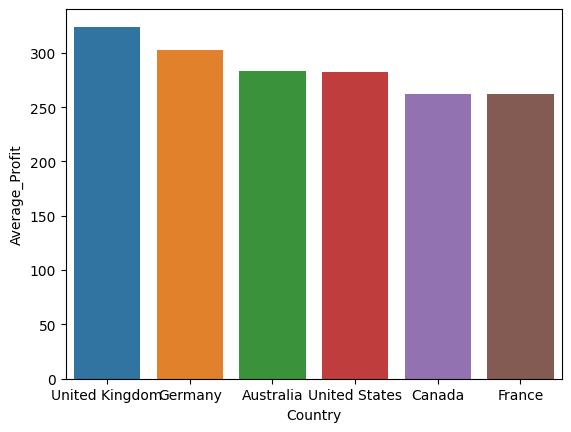

In [ ]:
sns.barplot(x='Country', y='Average_Profit', data=df_avg_profit)

<AxesSubplot: xlabel='avg_profit', ylabel='avg_revenue'>

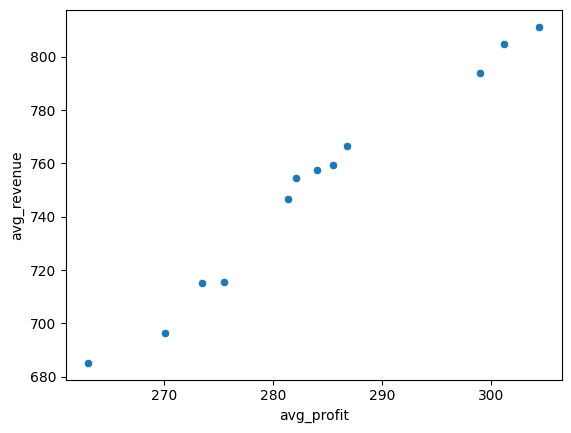

In [ ]:
df_month_profit = df.groupBy('Month').agg(avg('Profit').alias('avg_profit'), avg('Revenue').alias('avg_revenue'))
df_month_profit = df_month_profit.toPandas()
sns.scatterplot(x = 'avg_profit', y = 'avg_revenue', data = df_month_profit) 

<AxesSubplot: xlabel='avg_revenue', ylabel='Month'>

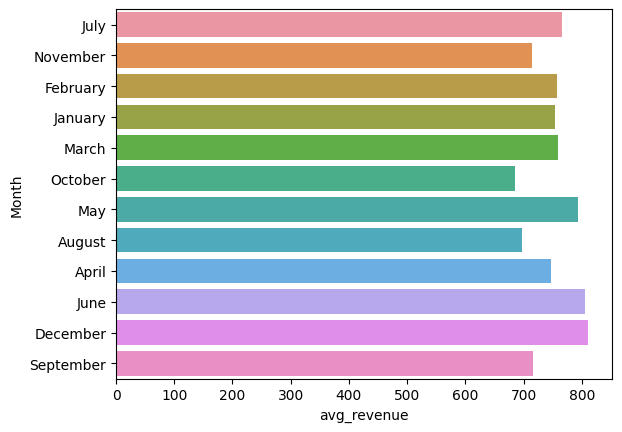

In [ ]:
sns.barplot(x = 'avg_revenue', y = 'Month', data = df_month_profit, orient='h') 